Part 1 : 
Visualize the distributions of classes in all the data sets of all proportions to show that you have prepared them appropriately


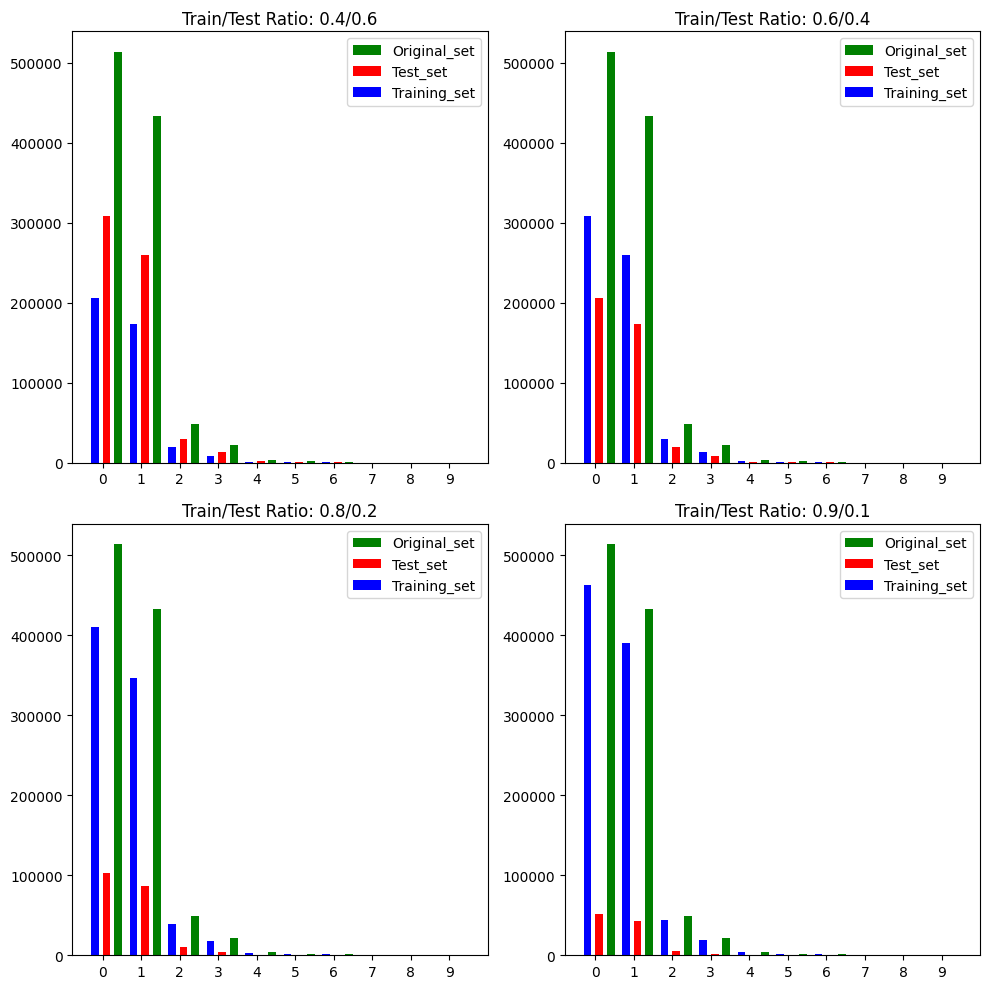

Part 2: 
Train/test 40/60 with max_depth = 7


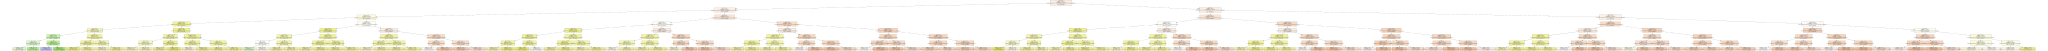

Train/test 60/40 with max_depth = 7


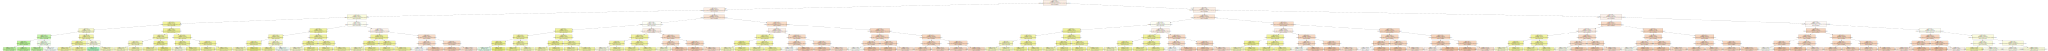

Train/test 80/20 with max_depth = 7


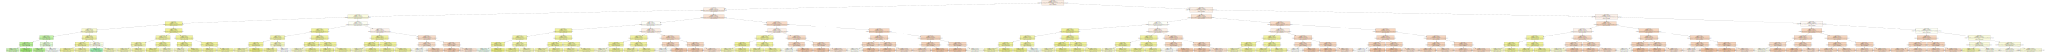

Train/test 90/10 with max_depth = 7


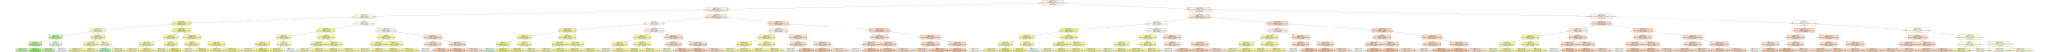

Part 3 : 

Train/Test Ratio: 410004/615006
Classification Report:
                    precision    recall  f1-score   support

0: Nothing in hand       0.58      0.76      0.66    308221
1: One pair              0.52      0.42      0.46    259858
2: Two pairs             0.47      0.00      0.01     29297
3: Three of a kind       1.00      0.00      0.00     12980
4: Straight              1.00      0.00      0.00      2387
5: Flush                 1.00      0.00      0.00      1230
6: Full house            0.24      0.00      0.01       876
7: Four of a kind        1.00      0.00      0.00       142
8: Straight flush        1.00      0.00      0.00        10
9: Royal flush           1.00      0.00      0.00         5

          accuracy                           0.56    615006
         macro avg       0.78      0.12      0.11    615006
      weighted avg       0.56      0.56      0.53    615006

Confusion Matrix:


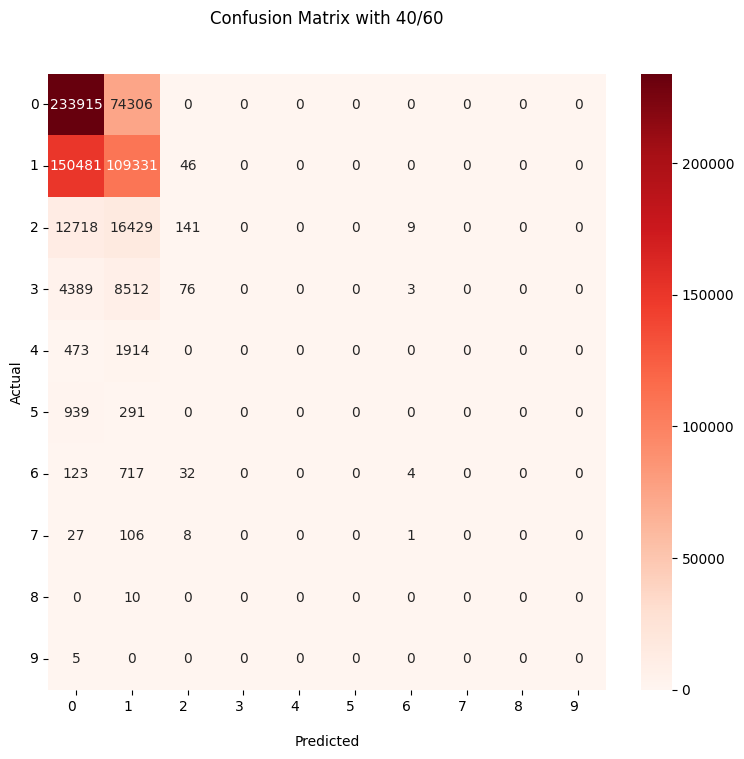

-----------------------------

Train/Test Ratio: 615006/410004
Classification Report:
                    precision    recall  f1-score   support

0: Nothing in hand       0.58      0.76      0.66    205481
1: One pair              0.52      0.42      0.46    173239
2: Two pairs             0.55      0.00      0.01     19531
3: Three of a kind       0.33      0.01      0.01      8654
4: Straight              1.00      0.00      0.00      1591
5: Flush                 1.00      0.00      0.00       820
6: Full house            1.00      0.00      0.00       584
7: Four of a kind        1.00      0.00      0.00        94
8: Straight flush        1.00      0.00      0.00         7
9: Royal flush           1.00      0.00      0.00         3

          accuracy                           0.56    410004
         macro avg       0.80      0.12      0.11    410004
      weighted avg       0.55      0.56      0.53    410004

Confusion Matrix:


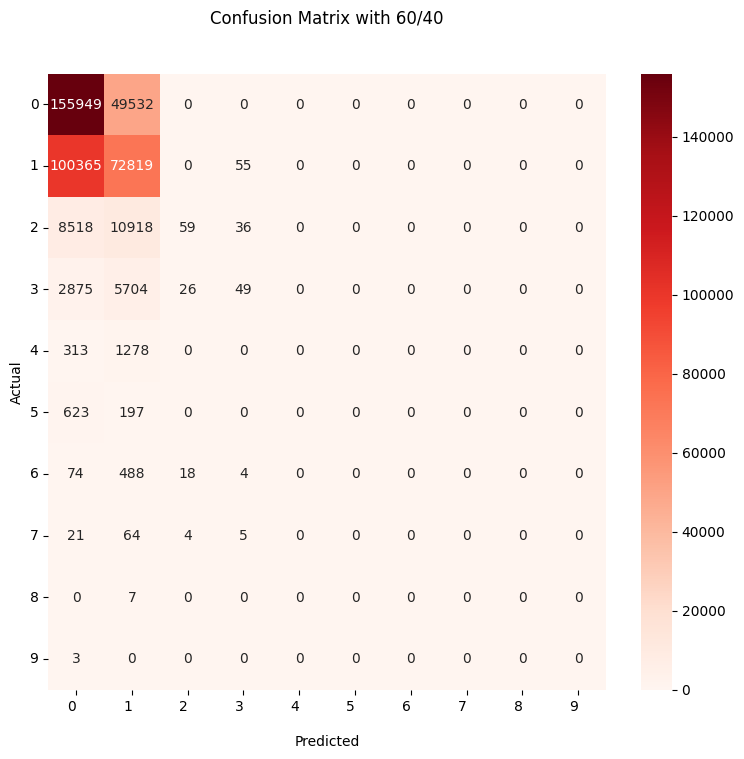

-----------------------------

Train/Test Ratio: 820008/205002
Classification Report:
                    precision    recall  f1-score   support

0: Nothing in hand       0.58      0.75      0.66    102740
1: One pair              0.52      0.43      0.47     86619
2: Two pairs             0.36      0.00      0.01      9766
3: Three of a kind       0.36      0.01      0.01      4327
4: Straight              1.00      0.00      0.00       796
5: Flush                 1.00      0.00      0.00       410
6: Full house            1.00      0.00      0.00       292
7: Four of a kind        1.00      0.00      0.00        47
8: Straight flush        1.00      0.00      0.00         3
9: Royal flush           1.00      0.00      0.00         2

          accuracy                           0.56    205002
         macro avg       0.78      0.12      0.11    205002
      weighted avg       0.54      0.56      0.53    205002

Confusion Matrix:


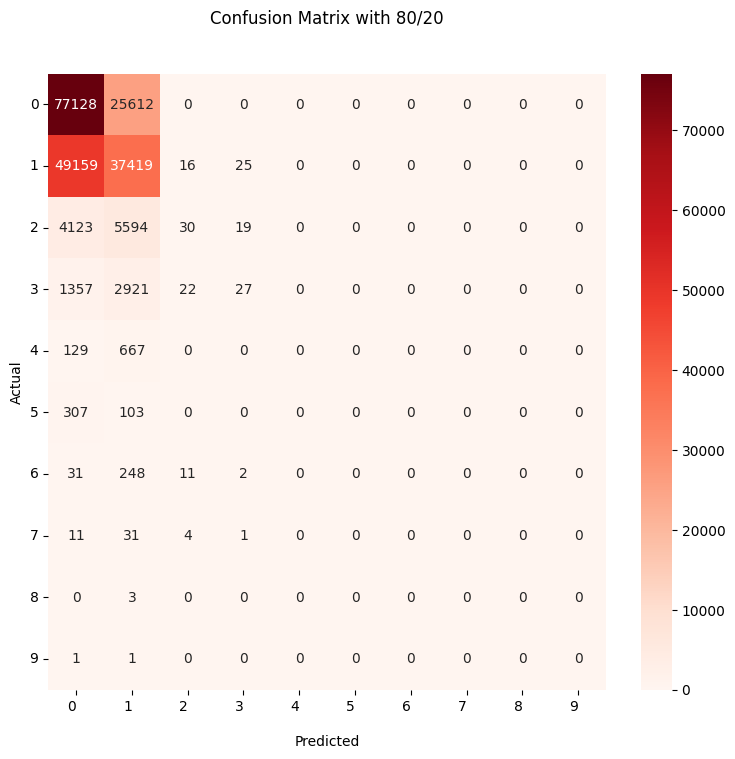

-----------------------------

Train/Test Ratio: 922509/102501
Classification Report:
                    precision    recall  f1-score   support

0: Nothing in hand       0.58      0.75      0.66     51370
1: One pair              0.51      0.43      0.47     43310
2: Two pairs             0.40      0.00      0.01      4883
3: Three of a kind       0.22      0.00      0.01      2163
4: Straight              1.00      0.00      0.00       398
5: Flush                 1.00      0.00      0.00       205
6: Full house            1.00      0.00      0.00       146
7: Four of a kind        1.00      0.00      0.00        23
8: Straight flush        1.00      0.00      0.00         2
9: Royal flush           1.00      0.00      0.00         1

          accuracy                           0.56    102501
         macro avg       0.77      0.12      0.11    102501
      weighted avg       0.54      0.56      0.53    102501

Confusion Matrix:


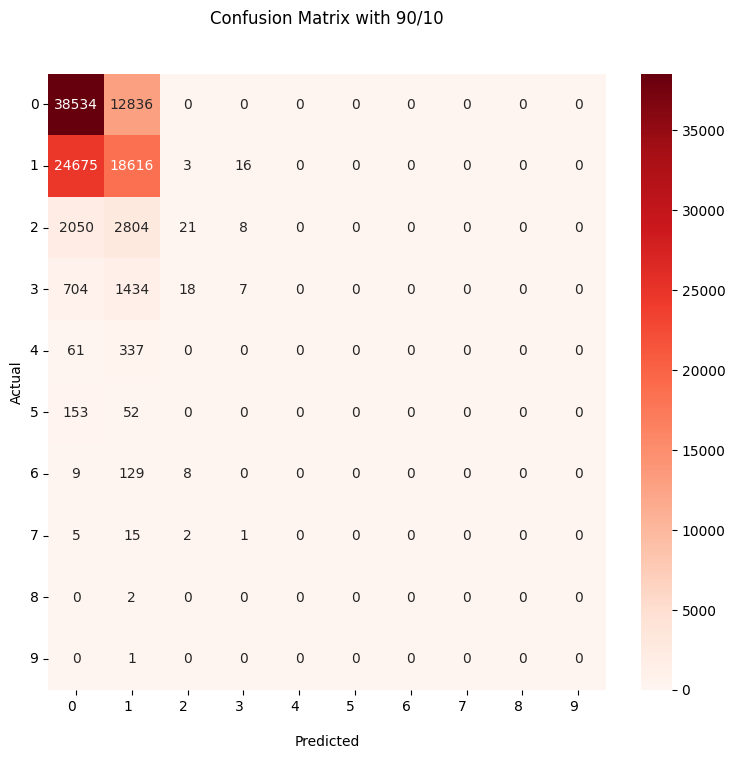

-----------------------------
Part 4 : 
Decision tree 80/20 : 
Max_depth = 2


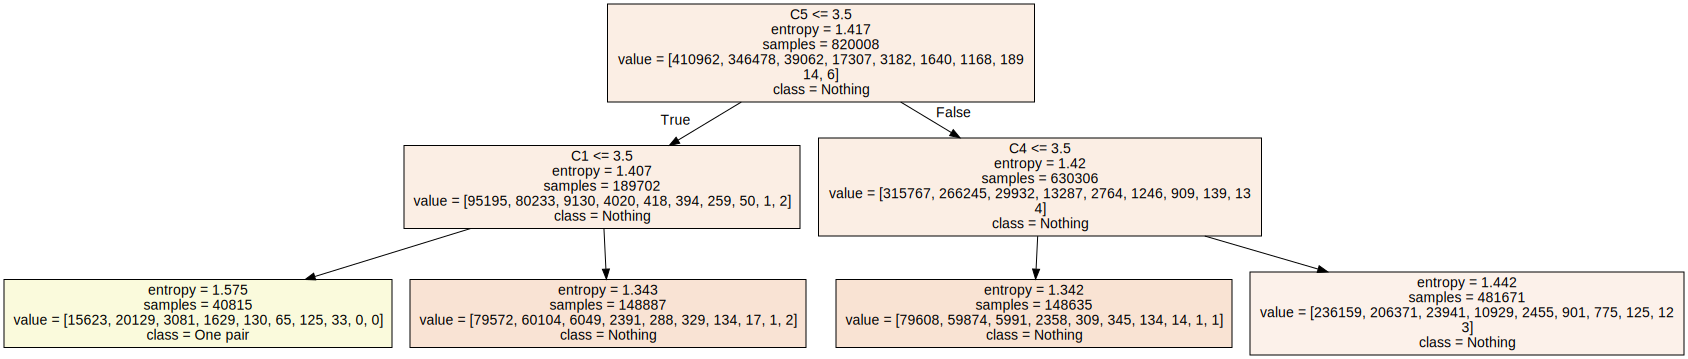

Max_depth = 3


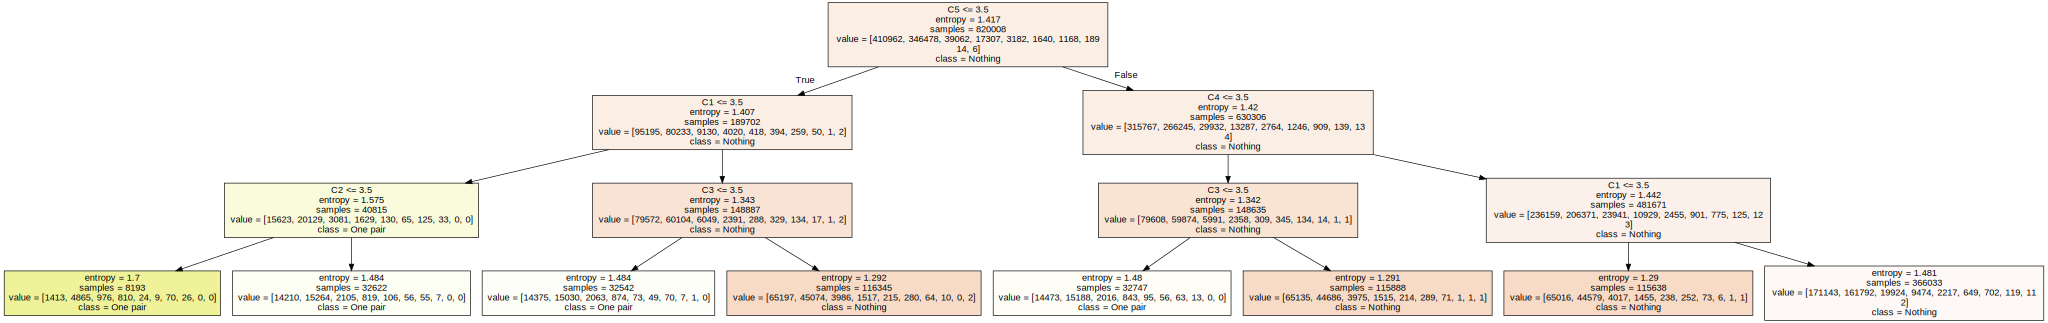

Max_depth = 4


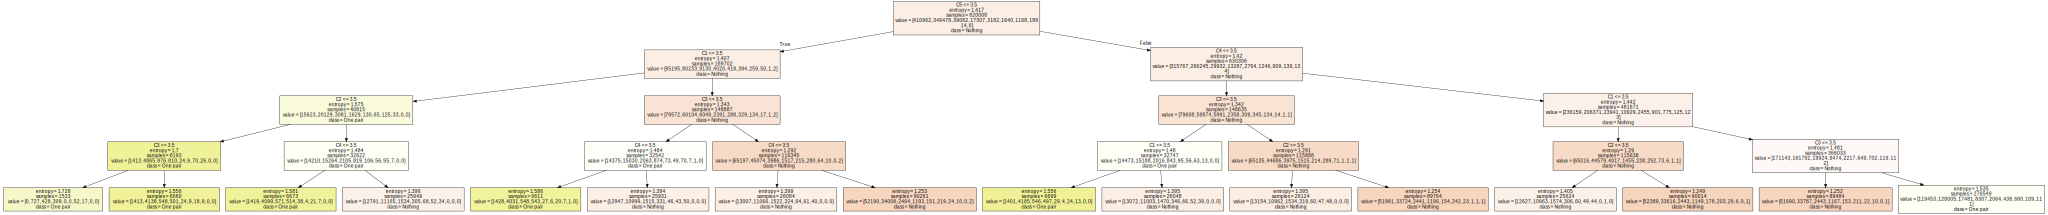

Max_depth = 5


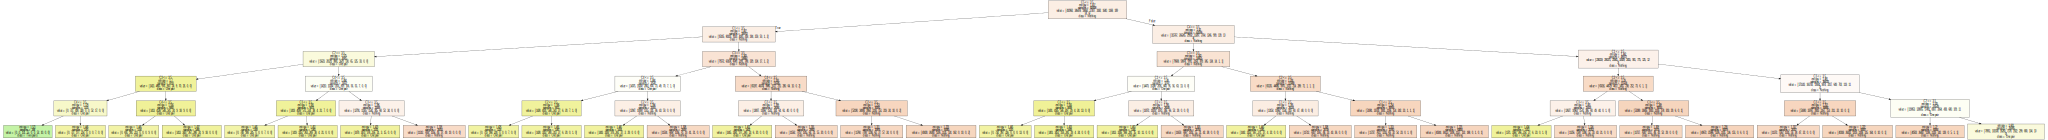

Max_depth = 6


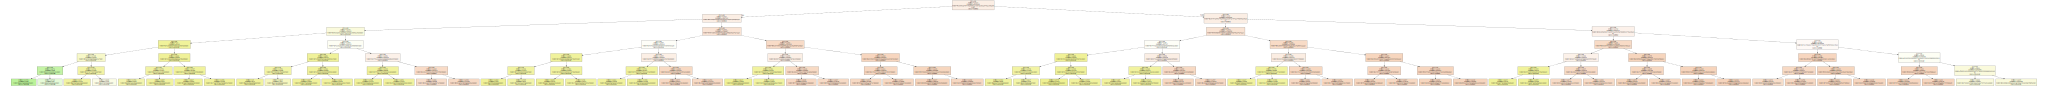

Max_depth = 7


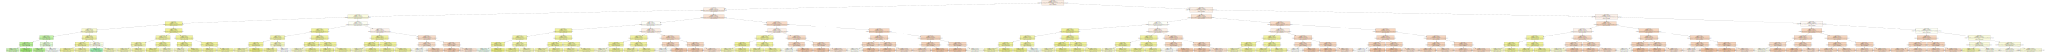

Accuracy
None		0.6460473556355548
2		0.505795065413996
3		0.5079462639388884
4		0.5270582726022185
5		0.5584579662637438
6		0.5584579662637438
7		0.5590384484053814


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
import graphviz
from graphviz import Source
import matplotlib.pyplot as plt
from IPython.display import Image,SVG,display  
import pydotplus
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score

print ("Part 1 : ")
# Merge the two files into a single CSV file
file_train = 'poker-hand-training-true.data'
file_test = 'poker-hand-testing.data'
file_merged = 'poker-hand-data.csv'

with open(file_train, 'r') as f_train, open(file_test, 'r') as f_test, open(file_merged, 'w') as f_merged:
    f_merged.write(f_train.read())
    f_merged.write(f_test.read())

# Load the merged dataset
attribute_info = ['S1', 'C1', 'S2', 'C2', 'S3', 
                    'C3', 'S4', 'C4', 'S5', 'C5','Class']
data = pd.read_csv(file_merged, header=None , names=attribute_info)

#Split the dataset into features and labels
features = data.iloc[:, :-1]  # Exclude the last column
labels = data.iloc[:, -1]  # Select the last column as labels
#Perform stratified splitting
train_sizes = [0.4, 0.6, 0.8, 0.9]
test_sizes = [0.6, 0.4, 0.2, 0.1]
random_state = 1

subsets = []
for train_size, test_size in zip(train_sizes, test_sizes):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, 
                                                        train_size=train_size, 
                                                        test_size=test_size, 
                                                        random_state=random_state, 
                                                        stratify=labels)
    subsets.append((X_train, y_train, X_test, y_test))

#Generate 16 subsets for different proportions

# (train/test) 40/60
feature_train_40, label_train_40, feature_test_40, label_test_40 = subsets[0]
# (train/test) 60/40
feature_train_60, label_train_60, feature_test_60, label_test_60 = subsets[1]
# (train/test) 80/20
feature_train_80, label_train_80, feature_test_80, label_test_80 = subsets[2]
# (train/test) 90/10
feature_train_90, label_train_90, feature_test_90, label_test_90 = subsets[3]


lable_train = (label_train_40,label_train_60,label_train_80,label_train_90)
lable_test = (label_test_40,label_test_60,label_test_80,label_test_90)

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

bar_width = 0.2  # Width of each bar
offset = 0.1  # Offset between each bar group
print ("Visualize the distributions of classes in all the data sets of all proportions to show that you have prepared them appropriately")
for i in range(4):
    ax = axs[i // 2][i % 2]
    unique_train, counts_train = np.unique(lable_train[i], return_counts=True)
    unique_test, counts_test = np.unique(lable_test[i], return_counts=True)
    unique_labels, counts_labels = np.unique(labels, return_counts=True)
    
    # Calculate the x-axis positions for each bar group
    x_train = np.arange(len(unique_train))
    x_test = x_train + bar_width + offset
    x_all = x_train + 2 * (bar_width + offset)

    ax.bar(x_all, counts_labels, width=bar_width, color='green', alpha=1, label='Original_set')
    ax.bar(x_test, counts_test, width=bar_width, color='red', alpha=1, label='Test_set')
    ax.bar(x_train, counts_train, width=bar_width, color='blue', alpha=1, label='Training_set')
    
    ax.set_xticks(x_train + bar_width)  # Set the x-axis tick positions to the center of each bar group
    ax.set_xticklabels(unique_train)  # Set the x-axis tick labels as the unique classes
    
    ax.set_title(f'Train/Test Ratio: {train_sizes[i]}/{test_sizes[i]}')
    ax.legend()

plt.tight_layout()
plt.savefig('class_distribution.png')
plt.show()

print ("Part 2: ")
class_labels = ['0: Nothing in hand',
         '1: One pair       ',
         '2: Two pairs      ',
         '3: Three of a kind',          
         '4: Straight       ',
         '5: Flush          ',
         '6: Full house     ',
         '7: Four of a kind ',
         '8: Straight flush ',
         '9: Royal flush    ']
# Create a function to build and visualize the decision tree
def build_and_visualize_decision_tree(X_train, y_train, max_depth = None):
    clf = DecisionTreeClassifier(criterion='entropy',max_depth=max_depth)
    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    # Visualize the decision tree
    class_labels = ['Nothing', 'One pair', 'Two pairs', 'Three of a kind', 'Straight', 
                        'Flush', 'Full house', 'Four of a kind', 'Straight flush', 'Royal flush']

    graph = Source(tree.export_graphviz(clf, out_file=None
        , feature_names=attribute_info[:-1], class_names=class_labels 
        , filled = True))
    return graph
print ("Train/test 40/60 with max_depth = 7")
graph1 = build_and_visualize_decision_tree(feature_train_40, label_train_40,7)
display(SVG(graph1.pipe(format='svg')))
print ("Train/test 60/40 with max_depth = 7")
graph2 = build_and_visualize_decision_tree(feature_train_60, label_train_60,7)
display(SVG(graph2.pipe(format='svg')))
print ("Train/test 80/20 with max_depth = 7")
graph3 = build_and_visualize_decision_tree(feature_train_80, label_train_80,7)
display(SVG(graph3.pipe(format='svg')))
print ("Train/test 90/10 with max_depth = 7")
graph4 = build_and_visualize_decision_tree(feature_train_90, label_train_90,7)
display(SVG(graph4.pipe(format='svg')))

print ("Part 3 : ")
def evaluating_the_decision_tree_classifiers(X_train, X_test, y_train, y_test):
    # Build and fit the decision tree classifier
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=7)
    clf.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(X_test)

    # Generate classification report and confusion matrix
    report = classification_report(y_test, y_pred,target_names=class_labels, zero_division=1)
    matrix = confusion_matrix(y_test, y_pred)

    print(f"\nTrain/Test Ratio: {len(X_train)}/{len(X_test)}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    fig, ax = plt.subplots(figsize=(9, 8))
    ax = sns.heatmap(matrix, annot=True, cmap='Reds', fmt='d')

    ax.set_xticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], rotation=0, ha='right', fontsize=10)
    ax.set_yticklabels([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], rotation=0, ha='right', fontsize=10)

    if X_train.equals(feature_train_40):
        title_str = 'Confusion Matrix with 40/60\n\n'
    elif X_train.equals(feature_train_60):
        title_str = 'Confusion Matrix with 60/40\n\n'
    elif X_train.equals(feature_train_80):
        title_str = 'Confusion Matrix with 80/20\n\n'
    elif X_train.equals(feature_train_90):
        title_str = 'Confusion Matrix with 90/10\n\n'
    else:
        title_str = 'Confusion Matrix\n\n'

    ax.set_title(title_str)
    ax.set_xlabel('\nPredicted')
    ax.set_ylabel('Actual')
    plt.show()
    print("-----------------------------")
  
# Evaluate the decision tree classifiers for all four subsets
evaluating_the_decision_tree_classifiers(feature_train_40, feature_test_40, label_train_40, label_test_40)
evaluating_the_decision_tree_classifiers(feature_train_60, feature_test_60, label_train_60, label_test_60)
evaluating_the_decision_tree_classifiers(feature_train_80, feature_test_80, label_train_80, label_test_80)
evaluating_the_decision_tree_classifiers(feature_train_90, feature_test_90, label_train_90, label_test_90)

def evaluate_decision_tree(X_train, X_test, y_train, y_test, max_depth=None):
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

print("Part 4 : ")
# List to store accuracy scores for different max_depth values
accuracy_scores = []
print("Decision tree 80/20 : ")
print("Max_depth = 2")
graph5 = build_and_visualize_decision_tree(feature_train_80, label_train_80,2)
display(SVG(graph5.pipe(format='svg')))
print("Max_depth = 3")
graph6 = build_and_visualize_decision_tree(feature_train_80, label_train_80,3)
display(SVG(graph6.pipe(format='svg')))
print("Max_depth = 4")
graph7 = build_and_visualize_decision_tree(feature_train_80, label_train_80,4)
display(SVG(graph7.pipe(format='svg')))
print("Max_depth = 5")
graph8 = build_and_visualize_decision_tree(feature_train_80, label_train_80,5)
display(SVG(graph8.pipe(format='svg')))
print("Max_depth = 6")
graph9 = build_and_visualize_decision_tree(feature_train_80, label_train_80,6)
display(SVG(graph9.pipe(format='svg')))
print("Max_depth = 7")
graph10 = build_and_visualize_decision_tree(feature_train_80, label_train_80,7)
display(SVG(graph10.pipe(format='svg')))


# Loop through different max_depth values and evaluate decision tree classifiers
max_depth_values = [None , 2, 3, 4, 5, 6, 7]
for max_depth in max_depth_values:
    accuracy = evaluate_decision_tree(feature_train_80, feature_test_80, label_train_80, label_test_80, max_depth=max_depth)
    accuracy_scores.append(accuracy)

# Print the accuracy scores and decision tree graphs
print("Accuracy")
for i, max_depth in enumerate(max_depth_values):
    print(f"{max_depth}\t\t{accuracy_scores[i]}")